### Installation

In [ ]:
!pip install mne seaborn==0.9.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [4]:
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt

In [64]:
data_path = '/content/drive/MyDrive/BrainHack24_OpenBCI/Eyes_open_closed/003/OpenBCI-RAW-2023-12-15_14-22-04.csv'

In [89]:
data = pd.read_csv(data_path, index_col=-1)

In [125]:
data.head(10)

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,EXG Channel 8,...,Other.2,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7
Timestamp (Formatted),,,,,,,,,,,,,,,,,,,,,
2023-12-15 14:22:04.955,80,16166.010940,13858.103910,-78919.80754,-71711.88405,-56453.42099,187500.00000,-43988.14368,-52948.80157,-40697.16223,...,0,0,41,72.0,9.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.039,0,8286.238704,7103.183222,-39178.36120,-35599.31047,-27956.62319,93749.98882,-22213.99065,-25826.85957,-20367.49069,...,0,0,41,104.0,61.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.046,2,16279.736610,13515.652840,-78448.09633,-71349.87519,-55559.08299,187500.00000,-44141.00726,-51337.59842,-40626.70954,...,0,0,41,104.0,74.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.054,4,16478.577730,13904.796710,-78388.61834,-71232.19326,-55768.02710,187500.00000,-44271.49675,-51474.23464,-40755.05325,...,0,0,41,104.0,82.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.061,6,16330.139800,13599.650690,-78407.68437,-71318.73921,-55574.48334,187500.00000,-44177.28414,-51391.60024,-40590.32090,...,64,0,41,104.0,90.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.071,8,16448.358170,13827.660840,-78407.50556,-71249.42645,-55714.62878,187500.00000,-44221.96528,-51423.49618,-40758.65188,...,192,0,41,104.0,98.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.078,10,16343.148510,13673.456150,-78419.48610,-71320.21443,-55605.44051,187500.00000,-44200.03822,-51413.10262,-40586.94578,...,0,0,41,104.0,106.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.087,12,16404.392290,13731.973020,-78424.04585,-71265.74323,-55671.28875,187500.00000,-44175.65247,-51359.34667,-40776.84620,...,0,0,41,104.0,114.0,0,0,0,1.700000e+09,0
2023-12-15 14:22:05.093,14,16378.508970,13756.895220,-78391.03233,-71290.77718,-55642.67852,187500.00000,-44234.97400,-51443.61275,-40585.98466,...,0,0,41,104.0,122.0,0,0,0,1.700000e+09,0


In [272]:
selected_columns = [' EXG Channel 0',
 ' EXG Channel 1',
 ' EXG Channel 2',
 ' EXG Channel 3',
 ' EXG Channel 4',
#  ' EXG Channel 5',
 ' EXG Channel 6',
 ' EXG Channel 7',
 ' EXG Channel 8',
 ' EXG Channel 9',
 ' EXG Channel 10',
 ' EXG Channel 11',
 ' EXG Channel 12',
 ' EXG Channel 13',
 ' EXG Channel 14',
 ' EXG Channel 15']

selected_data = data[selected_columns]

In [273]:
ch_names = selected_data.columns.to_list()

In [275]:
ch_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg','eeg', 'eeg', 'eeg', 'eeg','eeg', 'eeg', 'eeg', 'eeg', 'eeg']

In [277]:
info = mne.create_info(ch_names= ch_names, ch_types= ch_types, sfreq= 125)
raw = mne.io.RawArray(selected_data.T, info)

Creating RawArray with float64 data, n_channels=15, n_times=33999
    Range : 0 ... 33998 =      0.000 ...   271.984 secs
Ready.


In [278]:
raw.times[-1]

271.984

In [279]:
raw_beta = raw.load_data().copy()

raw_beta = raw_beta.filter(l_freq=1, h_freq=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (3.304 s)



NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)


<ipython-input-280-956495d02486>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(ax=ax[0],picks=['eeg'], show = False, fmax=20, xscale="log")
<ipython-input-280-956495d02486>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_beta.plot_psd(ax=ax[1],picks=['eeg'], show = False, fmax=20, xscale="log")


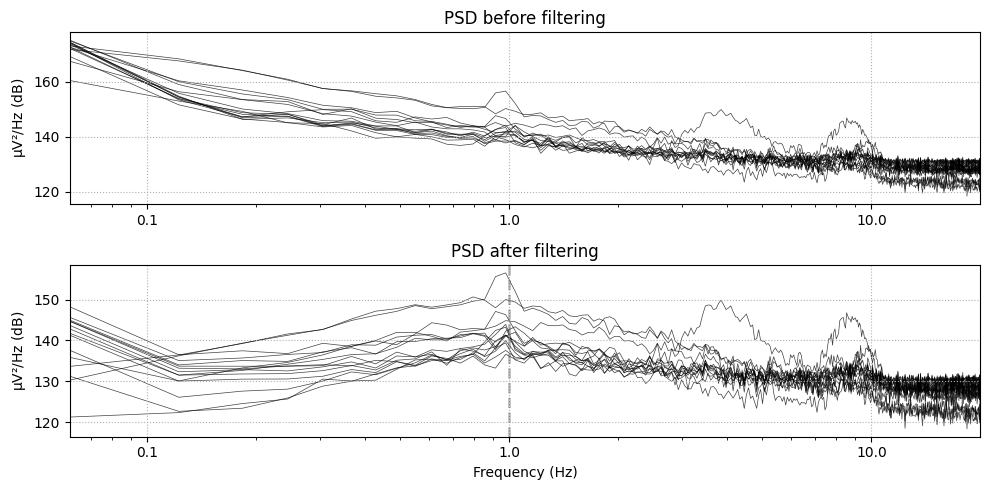

In [280]:
fig, ax = plt.subplots(2, figsize=(10,5))
raw.plot_psd(ax=ax[0],picks=['eeg'], show = False, fmax=20, xscale="log")
raw_beta.plot_psd(ax=ax[1],picks=['eeg'], show = False, fmax=20, xscale="log")

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

In [281]:
timestamps=[]
description=[]
for i in np.arange(4,raw_beta.times[-1],30):
  print(i)
  timestamps.append(i)

4.0
34.0
64.0
94.0
124.0
154.0
184.0
214.0
244.0


In [282]:
description =[]
for i in np.arange(len(timestamps)):
  if (i % 2) == 0:
    description.append('eyes open')
  else:
    description.append('eyes closed')

In [285]:
my_annot = mne.Annotations(
    onset=timestamps,  # in seconds
    duration=30,  # in seconds, too
    description=description
)
print(my_annot)

<Annotations | 9 segments: eyes closed (4), eyes open (5)>


In [286]:
raw_beta.set_annotations(my_annot)
print(raw_beta.annotations)

<Annotations | 9 segments: eyes closed (4), eyes open (5)>


<ipython-input-286-c7943b54c3f4>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_beta.set_annotations(my_annot)


In [287]:
events_from_annot, event_dict = mne.events_from_annotations(raw_beta)
print(event_dict)
print(events_from_annot[:5])

Used Annotations descriptions: ['eyes closed', 'eyes open']
{'eyes closed': 1, 'eyes open': 2}
[[  500     0     2]
 [ 4250     0     1]
 [ 8000     0     2]
 [11750     0     1]
 [15500     0     2]]


In [288]:
tmin = 0
tmax = 30
baseline = (0, 0)

epochs = mne.Epochs(raw_beta.copy(),
                    events=events_from_annot,
                    event_id=event_dict,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,reject={'eeg': 1e3},
                    preload=True)
epochs

Not setting metadata
9 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 9 events and 3751 original time points ...
1 bad epochs dropped


Number of events,8
Events,eyes closed: 4eyes open: 4
Time range,0.000 – 30.000 s
Baseline,0.000 – 0.000 s


In [289]:
print(epochs.event_id)

{'eyes closed': 1, 'eyes open': 2}


In [290]:
epochs.get_data().shape

<ipython-input-290-79b916371608>:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data().shape


(8, 15, 3751)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


<ipython-input-291-d5a8620c300c>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['eyes open'].plot_psd(fmin=2,fmax=30,xscale='log');


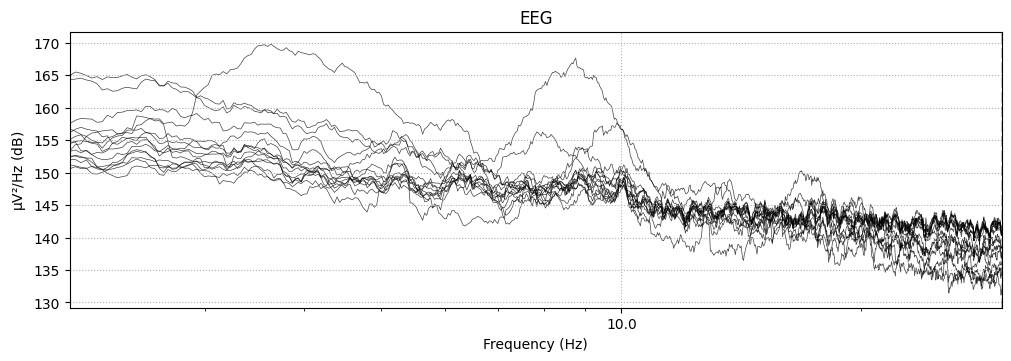

In [291]:
epochs['eyes open'].plot_psd(fmin=2,fmax=30,xscale='log');

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


<ipython-input-292-e91772d5b5df>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['eyes closed'].plot_psd(fmin=2,fmax=30,xscale='log');


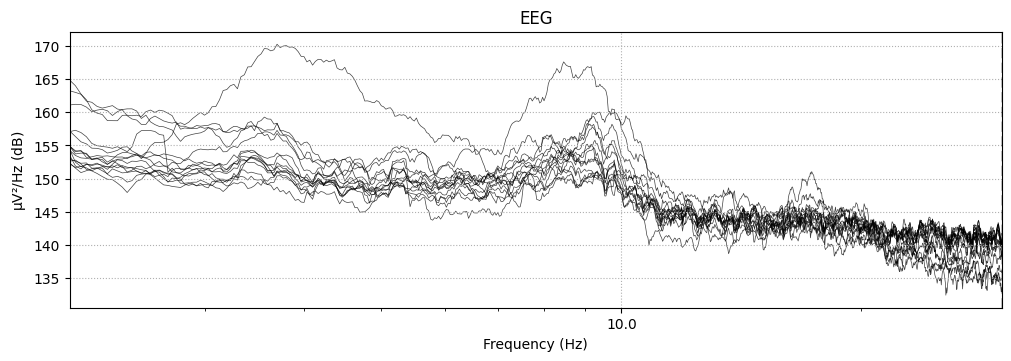

In [292]:
epochs['eyes closed'].plot_psd(fmin=2,fmax=30,xscale='log');